In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
# 결측치 특성 제거 최종 데이터셋
df_deleted = pd.read_csv('/Users/uisik/Desktop/keepup/project/arrhythmia_prevention/data/df_deleted_final.csv', index_col=0)

# 결측치 특성 대체 최종 데이터셋
df = pd.read_csv('/Users/uisik/Desktop/keepup/project/arrhythmia_prevention/data/df_final.csv', index_col=0)

In [3]:
df_deleted

,성별코드,연령대,수축기 혈압,이완기 혈압,식전혈당(공복혈당),흡연상태,음주여부,허리신장비율,위험군
0,1,45,127.0,79.0,90.0,1.0,0.0,0.437,0
1,2,65,110.0,73.0,87.0,1.0,0.0,0.540,1
2,2,60,123.0,80.0,102.0,1.0,0.0,0.452,0
3,1,65,134.0,84.0,146.0,1.0,0.0,0.568,1
4,2,60,144.0,89.0,110.0,1.0,0.0,0.485,1
...,...,...,...,...,...,...,...,...,...
995380,2,65,132.0,78.0,124.0,1.0,0.0,0.559,1
995381,2,60,100.0,64.0,98.0,1.0,1.0,0.478,0
995382,1,45,110.0,64.0,83.0,1.0,1.0,0.486,0
995383,2,45,137.0,82.0,111.0,1.0,0.0,0.569,1


In [4]:
df

,성별코드,연령대,수축기 혈압,이완기 혈압,식전혈당(공복혈당),총 콜레스테롤,중성지방,HDL 콜레스테롤,LDL 콜레스테롤,흡연상태,음주여부,허리신장비율,위험군
0,1.0,45.0,127.0,79.0,90.0,188.000000,58.000000,58.000000,118.000000,1.0,0.0,0.437,0
1,2.0,65.0,110.0,73.0,87.0,196.326753,107.014421,58.551332,116.408854,1.0,0.0,0.540,0
2,2.0,60.0,123.0,80.0,102.0,200.062149,103.676066,63.191703,116.211756,1.0,0.0,0.452,0
3,1.0,65.0,134.0,84.0,146.0,194.115555,169.881706,47.216657,113.175586,1.0,0.0,0.568,2
4,2.0,60.0,144.0,89.0,110.0,220.000000,171.000000,53.000000,133.000000,1.0,0.0,0.485,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
979698,2.0,65.0,132.0,78.0,124.0,178.000000,301.000000,43.000000,75.000000,1.0,0.0,0.559,3
979699,2.0,60.0,100.0,64.0,98.0,288.000000,93.000000,71.000000,198.000000,1.0,1.0,0.478,2
979700,1.0,45.0,110.0,64.0,83.0,194.434857,114.836737,55.330437,116.471475,1.0,1.0,0.486,0
979701,2.0,45.0,137.0,82.0,111.0,208.000000,113.000000,59.000000,126.000000,1.0,0.0,0.569,0


## 모델링을 위한 데이터셋 세팅


### 타겟 특성이 총 5개의 클래스로 구성되어있으므로 다중분류 모델 사용    

In [6]:
# 변수와 타겟 설정

# 결측치 제거 모델 변수
features_deleted = df_deleted.iloc[:, 0:8].columns.tolist()

# 결측치 대체 모델 변수
features = df.iloc[:, 0:12].columns.tolist()

# 타겟 특성은 동일하게 설정
target = '위험군'

In [7]:
# 변수의 범위가 모두 다르므로 정규화 진행

from sklearn.preprocessing import StandardScaler

# 표준 스케일러(평균 0, 분산 1)
scaler = StandardScaler()

# 변수 및 타겟 분리

# 결측치 제거 데이터셋
X_deleted = df_deleted[features_deleted]
y_deleted = df_deleted[target]

# 결측치 대체 데이터셋
X = df[features]
y = df[target]

# 변수 데이터 스케일링
X_scaled_deleted = scaler.fit_transform(X_deleted)
X_scaled = scaler.fit_transform(X)

In [8]:
# 모델 훈련과 검증을 위한 데이터셋 나누기(train, test)
from sklearn.model_selection import train_test_split

# 결측치 제거 데이터셋
X_train_deleted, X_test_deleted, y_train_deleted, y_test_deleted = train_test_split(X_scaled_deleted, y_deleted, test_size=0.3, random_state=77)

# 결측치 대체 데이터셋
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=77)

print('결측치 제거 훈련 데이터 :', X_train_deleted.shape, y_train_deleted.shape)
print('결측치 제거 테스트 데이터 :', X_test_deleted.shape, y_test_deleted.shape)
print()
print('결측치 대체 훈련 데이터 :', X_train.shape, y_train.shape)
print('결측치 대체 테스트 데이터 :', X_test.shape, y_test.shape)

결측치 제거 훈련 데이터 : (696769, 8) (696769,)
결측치 제거 테스트 데이터 : (298616, 8) (298616,)

결측치 대체 훈련 데이터 : (783762, 12) (783762,)
결측치 대체 테스트 데이터 : (195941, 12) (195941,)


In [9]:
# 클래스 확인

print('클래스 :', df_deleted.iloc[:, 8].unique())
print('클래스 수:', len(df_deleted.iloc[:, 8].unique()))
print()
print('클래스 :', df.iloc[:, 12].unique())
print('클래스 수:', len(df.iloc[:, 12].unique()))

클래스 : [0 1 2 3 4]
클래스 수: 5

클래스 : [0 2 1 4 3]
클래스 수: 5


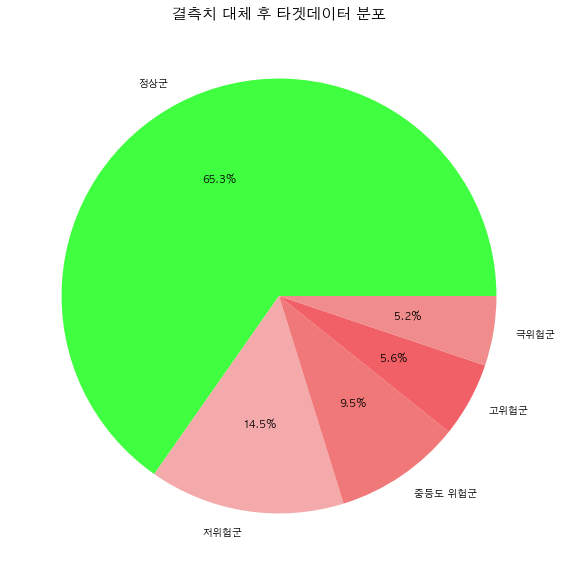

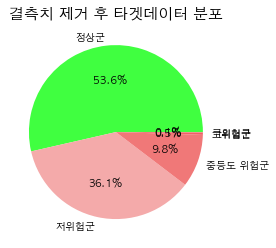

In [10]:
# 클래스 분포 시각화
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'AppleGothic'

# 결측치 제거 타겟데이터 비율
class_ratio_deleted = df_deleted['위험군'].value_counts()

# 결측치 대체 타겟데이터 비율
class_ratio = df['위험군'].value_counts()


plt.figure(figsize=(10,10))

# 결측치 대체 타겟 데이터 비율
plt.pie(class_ratio,
        labels=['정상군','저위험군','중등도 위험군','고위험군','극위험군'],
        colors=['#40FF40', '#F4AAAA','#F07878', '#F06066', '#F08C8C'], autopct='%.1f%%')
plt.title('결측치 대체 후 타겟데이터 분포', fontsize=15)
plt.show()

# 결측치 제거 타겟 데이터 비율
plt.pie(class_ratio_deleted,
        labels=['정상군','저위험군','중등도 위험군','고위험군','극위험군'],
        colors=['#40FF40', '#F4AAAA','#F07878', '#F06066', '#F08C8C'], autopct='%.1f%%')
plt.title('결측치 제거 후 타겟데이터 분포', fontsize=15)
plt.show()



## 신경망 모델(베이스 모델)

#### 베이스 모델로 딥러닝 모델을 선택한 이유

신경망 모델은 데이터에서 필요한 특성을 알아서 조합하여 찾아내기 때문에 최소한의 전처리만 수행한 후 모델링을 진행해도 **기본적인 성능이 보장됨**</br>

이와 다르게 머신러닝 모델은 데이터셋이 가진 특성을 최대한 파악한 후 가장 중요한 특성을 직접 찾아내고 설계해야하는 전처리과정을 거쳐야 모델의 성능을 확보할 수 있음

이렇게 스스로 특성 관계를 찾아내는 것을 표현 학습(Representation Learning)이라고 함

앞서 임상에 사용되는 기준에 따라 전처리까지 진행했기 때문에 좋은 성능을 기대해볼 수 있다고 생각하여 베이스 모델로 채택했고 다른 머신러닝 모델과 성능 비교후 최종 모델 채택

In [12]:
tf.config.run_functions_eagerly(True)

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf

# 가중치 초기화
initializer = tf.keras.initializers.he_normal()

# 모델 구축
# 결측치 제거 모델
nn_deleted = Sequential()
nn_deleted.add(Dense(20, input_dim=8, kernel_initializer=initializer, activation='relu'))
nn_deleted.add(Dense(30, activation='relu'))
nn_deleted.add(Dense(5, activation='softmax'))
nn_deleted.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 결측치 대체 모델
# 입력 차원(input_dim) 차이
nn = Sequential()
nn.add(Dense(20, input_dim=12, kernel_initializer=initializer, activation='relu'))
nn.add(Dense(30, activation='relu'))
nn.add(Dense(5, activation='softmax'))
nn.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Metal device set to: Apple M1 Pro


2022-07-06 01:39:03.785737: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-07-06 01:39:03.786040: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [13]:
# 모델 학습

# 결측치 제거 모델
history_deleted = nn_deleted.fit(X_train_deleted, y_train_deleted, batch_size=300, epochs=10, verbose=2, validation_split=0.3)

Epoch 1/10


2022-07-06 01:39:21.315025: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1626/1626 - 20s - loss: 0.3577 - accuracy: 0.8564 - val_loss: 0.2504 - val_accuracy: 0.8935 - 20s/epoch - 12ms/step
Epoch 2/10
1626/1626 - 21s - loss: 0.2311 - accuracy: 0.9027 - val_loss: 0.2138 - val_accuracy: 0.9115 - 21s/epoch - 13ms/step
Epoch 3/10
1626/1626 - 21s - loss: 0.2026 - accuracy: 0.9158 - val_loss: 0.1906 - val_accuracy: 0.9215 - 21s/epoch - 13ms/step
Epoch 4/10
1626/1626 - 21s - loss: 0.1818 - accuracy: 0.9258 - val_loss: 0.1733 - val_accuracy: 0.9292 - 21s/epoch - 13ms/step
Epoch 5/10
1626/1626 - 21s - loss: 0.1627 - accuracy: 0.9348 - val_loss: 0.1539 - val_accuracy: 0.9395 - 21s/epoch - 13ms/step
Epoch 6/10
1626/1626 - 21s - loss: 0.1477 - accuracy: 0.9417 - val_loss: 0.1399 - val_accuracy: 0.9459 - 21s/epoch - 13ms/step
Epoch 7/10
1626/1626 - 22s - loss: 0.1363 - accuracy: 0.9467 - val_loss: 0.1303 - val_accuracy: 0.9497 - 22s/epoch - 13ms/step
Epoch 8/10
1626/1626 - 20s - loss: 0.1259 - accuracy: 0.9511 - val_loss: 0.1208 - val_accuracy: 0.9542 - 20s/epoch - 12ms/

In [15]:
# 결측치 대체 모델
history = nn.fit(X_train, y_train, batch_size=300, epochs=10, verbose=2, validation_split=0.3)

Epoch 1/10
1829/1829 - 22s - loss: 0.3562 - accuracy: 0.8434 - val_loss: 0.3561 - val_accuracy: 0.8422 - 22s/epoch - 12ms/step
Epoch 2/10
1829/1829 - 21s - loss: 0.3504 - accuracy: 0.8457 - val_loss: 0.3505 - val_accuracy: 0.8442 - 21s/epoch - 12ms/step
Epoch 3/10
1829/1829 - 21s - loss: 0.3462 - accuracy: 0.8476 - val_loss: 0.3453 - val_accuracy: 0.8464 - 21s/epoch - 12ms/step
Epoch 4/10
1829/1829 - 21s - loss: 0.3424 - accuracy: 0.8493 - val_loss: 0.3431 - val_accuracy: 0.8478 - 21s/epoch - 12ms/step
Epoch 5/10
1829/1829 - 21s - loss: 0.3392 - accuracy: 0.8505 - val_loss: 0.3380 - val_accuracy: 0.8507 - 21s/epoch - 12ms/step
Epoch 6/10
1829/1829 - 21s - loss: 0.3365 - accuracy: 0.8521 - val_loss: 0.3372 - val_accuracy: 0.8508 - 21s/epoch - 12ms/step
Epoch 7/10
1829/1829 - 21s - loss: 0.3338 - accuracy: 0.8532 - val_loss: 0.3339 - val_accuracy: 0.8531 - 21s/epoch - 12ms/step
Epoch 8/10
1829/1829 - 21s - loss: 0.3312 - accuracy: 0.8545 - val_loss: 0.3334 - val_accuracy: 0.8526 - 21s/ep

In [16]:
# 성능 파악을 위한 예측값 저장

# 결측치 제거 모델
nn_deleted_predict = nn_deleted.predict(X_test_deleted)

# 결측치 대체 모델
nn_predict = nn.predict(X_test)

6124/6124 [==============================] - 10s 2ms/step


In [17]:
# 정밀도, 재현율, 조화평균 파악
from sklearn.metrics import classification_report

# 결측치 제거 모델 리포트
nn_deleted_report = classification_report(y_test_deleted, np.argmax(nn_deleted_predict, axis=1))

# 결측치 대체 모델 리포트
nn_report = classification_report(y_test, np.argmax(nn_predict, axis=1))

print(f'결측치 제거 모델 리포트 : \n {nn_deleted_report} \n')
print(f'결측치 대체 모델 리포트 : \n {nn_report} \n')

결측치 제거 모델 리포트 : 
               precision    recall  f1-score   support

           0       0.98      0.98      0.98    160175
           1       0.94      0.96      0.95    107609
           2       0.92      0.86      0.89     29299
           3       0.72      0.63      0.67      1371
           4       0.57      0.30      0.39       162

    accuracy                           0.96    298616
   macro avg       0.83      0.74      0.78    298616
weighted avg       0.96      0.96      0.96    298616
 

결측치 대체 모델 리포트 : 
               precision    recall  f1-score   support

           0       0.95      0.96      0.96    128182
           1       0.68      0.63      0.65     28265
           2       0.61      0.68      0.64     18508
           3       0.61      0.57      0.59     10946
           4       0.85      0.80      0.83     10040

    accuracy                           0.86    195941
   macro avg       0.74      0.73      0.73    195941
weighted avg       0.86      0.86      

<center>
    신경망 모델 성능 비교</br>

|결측치 처리 방법|정확도|macro avg of f1-score|weighted avg of f1-score|
|---|---|---|---|
|결측치 제거|0.9|0.78|0.96|
|결측치 대체|0.86|0.73|0.86|</center>

**macro avg** : 각 클래스에 대한 f1-score를 계산한 뒤 단순한 산술평균을 내어 f1-score를 계산한 값</br>
**weighted avg** : 각 클래스에 대한 f1-score를 계산한 뒤 각 클래스 별 데이터 비율에 따른 가중 평균을 내어 f1-score를 계산한 값

#### 신경망 모델 평가 

1. 데이터가 많이 확보된 클래스에 대해서만 좋은 성능을 보여주고 고위험군, 극위험군은 분류를 제대로 하지 못함
2. 결측치를 대체한 데이터셋을 활용했을 때 예측에 활용할 수 있는 데이터가 더 많고 지질관련 특성이라 성능이 더 좋게 나올 것이라 생각했는데 정반대의 결과가 나옴
3. 다른 모델에도 적용해보고 어떤 데이터셋으로 모델링 진행할지 결정

## 로지스틱 회귀 모델


기본적인 선형 모델 중 유일하게 다중분류를 지원하는 모델이기 때문에 시도</br>

In [18]:
from sklearn.linear_model import LogisticRegression

# 결측치 제거 모델 학습
lr_deleted = LogisticRegression(C=20, max_iter=100, random_state=77)
lr_deleted.fit(X_train_deleted, y_train_deleted)

# 결측치 대체 모델 학습
lr = LogisticRegression(C=20, max_iter=100, random_state=77)
lr.fit(X_train, y_train)

LogisticRegression(C=20, random_state=77)

In [19]:
# 결측치 제거 모델 예측값
lr_deleted_predict = lr_deleted.predict(X_test_deleted)

# 결측치 대체 모델 예측값
lr_predict = lr.predict(X_test)

In [20]:
# 결측치 제거 모델 리포트
lr_deleted_report = classification_report(y_test_deleted, lr_deleted_predict)

# 결측치 대체 모델 리포트
lr_report = classification_report(y_test, lr_predict)

print(f'결측치 제거 모델 리포트 : \n {lr_deleted_report} \n')
print(f'결측치 대체 모델 리포트 : \n {lr_report} \n')

결측치 제거 모델 리포트 : 
               precision    recall  f1-score   support

           0       0.90      0.91      0.91    160175
           1       0.77      0.80      0.78    107609
           2       0.72      0.58      0.65     29299
           3       0.40      0.08      0.14      1371
           4       0.43      0.10      0.16       162

    accuracy                           0.84    298616
   macro avg       0.64      0.50      0.53    298616
weighted avg       0.83      0.84      0.83    298616
 

결측치 대체 모델 리포트 : 
               precision    recall  f1-score   support

           0       0.90      0.96      0.93    128182
           1       0.51      0.45      0.48     28265
           2       0.44      0.41      0.43     18508
           3       0.40      0.21      0.28     10946
           4       0.66      0.68      0.67     10040

    accuracy                           0.78    195941
   macro avg       0.58      0.54      0.56    195941
weighted avg       0.76      0.78      

<center>
    로지스틱 회귀 모델 평가</br>

|결측치 처리 방법|정확도|macro avg of f1-score|weighted avg of f1-score|
|---|---|---|---|
|결측치 제거|0.84|0.53|0.83|
|결측치 대체|0.78|0.56|0.77|</center>

#### 로지스틱 회귀 모델 평가

1. 신경망 모델보다 전반적으로 성능이 낮은데 선형회귀 방식을 사용하기 때문이라고 생각함
2. 전반적인 성능이 베이스모델로 채택한 신경망모델보다 낮기 때문에 하이퍼파라미터 튜닝이 의미가 없을 것이라 생각하고 다음 모델 계속 시도

## 랜덤포레스트 모델

의사결정나무 모델 여러 개를 훈련시켜서 그 결과를 종합해 예측하는 앙상블 알고리즘</br>
여러 개의 의사결정나무 모델을 통해 예측한 값의 평균을 취하여 최종적인 예측값을 산출하는 방식</br>
이를 배깅(bagging)이라 하는데 예측 모델의 일반화(안정성) 성능을 향상하는 데 도움이 됨</br>

신경망 모델과 같이 앙상블 모델 중 기본적인 성능이 뒷받침되는 모델이기때문에 시도

In [21]:
from sklearn.ensemble import RandomForestClassifier

In [22]:
# 결측치 제거 모델
rf_deleted = RandomForestClassifier(random_state=77)
rf_deleted.fit(X_train_deleted, y_train_deleted)

# 결측치 대체 모델
rf = RandomForestClassifier(random_state=77)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=77)

In [23]:
# 결측치 제거 모델 예측값
rf_deleted_predict = rf_deleted.predict(X_test_deleted)

# 결측치 대체 모델 예측값
rf_predict = rf.predict(X_test)

In [24]:
print(f'결측치 제거 모델 학습 정확도 :{rf_deleted.score(X_train_deleted, y_train_deleted).round(3)}')
print(f'결측치 대체 모델 학습 정확도 :{rf.score(X_train, y_train).round(3)}')

결측치 제거 모델 학습 정확도 :1.0
결측치 대체 모델 학습 정확도 :1.0


In [25]:
# 결측치 제거 모델 리포트
rf_deleted_report = classification_report(y_test_deleted, rf_deleted_predict)

# 결측치 대체 모델 리포트
rf_report = classification_report(y_test, rf_predict)

print(f'결측치 제거 모델 리포트 : \n {rf_deleted_report} \n')
print(f'결측치 대체 모델 리포트 : \n {rf_report} \n')

결측치 제거 모델 리포트 : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    160175
           1       1.00      1.00      1.00    107609
           2       1.00      1.00      1.00     29299
           3       0.99      0.96      0.97      1371
           4       0.99      0.92      0.96       162

    accuracy                           1.00    298616
   macro avg       1.00      0.97      0.98    298616
weighted avg       1.00      1.00      1.00    298616
 

결측치 대체 모델 리포트 : 
               precision    recall  f1-score   support

           0       0.99      1.00      1.00    128182
           1       0.97      0.97      0.97     28265
           2       0.95      0.95      0.95     18508
           3       0.94      0.90      0.92     10946
           4       0.95      0.96      0.96     10040

    accuracy                           0.98    195941
   macro avg       0.96      0.95      0.96    195941
weighted avg       0.98      0.98      

<center>
    랜덤포레스트 모델 평가</br>

|결측치 처리 방법|정확도|macro avg of f1-score|weighted avg of f1-score|
|---|---|---|---|
|결측치 제거|1.00|0.98|1.00|
|결측치 대체|0.98|0.96|0.98|</center>

#### 랜덤포레스트 모델 평가

1. 학습 정확도가 100%인 것과 모델 리포트를 살펴봤을 때 과적합이 발생한 것을 알 수 있음
2. 다른 앙상블 모델도 시도해보고 파라미터 조정할 때 과적합 개선 시도

## LGBM 모델

In [26]:
from lightgbm import LGBMClassifier

In [27]:
# 결측치 제거 모델
lgbm_deleted = LGBMClassifier(n_estimators=300, random_state=77)
lgbm_deleted.fit(X_train_deleted, y_train_deleted)

# 결측치 대체 모델
lgbm = LGBMClassifier(n_estimators=300, random_state=77)
lgbm.fit(X_train, y_train)

LGBMClassifier(n_estimators=300, random_state=77)

In [28]:
print(f'결측치 제거 모델 학습 정확도 :{lgbm_deleted.score(X_train_deleted, y_train_deleted).round(3)}')
print(f'결측치 대체 모델 학습 정확도 :{lgbm.score(X_train, y_train).round(3)}')

결측치 제거 모델 학습 정확도 :0.984
결측치 대체 모델 학습 정확도 :0.99


In [29]:
# 결측치 제거 모델 예측값
lgbm_deleted_predict = lgbm_deleted.predict(X_test_deleted, random_state=77)

# 결측치 대체 모델 예측값
lgbm_predict = lgbm.predict(X_test)

In [30]:
# 결측치 제거 모델 리포트
lgbm_deleted_report = classification_report(y_test_deleted, lgbm_deleted_predict)

# 결측치 대체 모델 리포트
lgbm_report = classification_report(y_test, lgbm_predict)

print(f'결측치 제거 모델 리포트 : \n {lgbm_deleted_report} \n')
print(f'결측치 대체 모델 리포트 : \n {lgbm_report} \n')

결측치 제거 모델 리포트 : 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99    160175
           1       0.98      0.98      0.98    107609
           2       0.94      0.94      0.94     29299
           3       0.57      0.56      0.56      1371
           4       0.12      0.12      0.12       162

    accuracy                           0.98    298616
   macro avg       0.72      0.72      0.72    298616
weighted avg       0.98      0.98      0.98    298616
 

결측치 대체 모델 리포트 : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    128182
           1       0.97      0.98      0.98     28265
           2       0.96      0.95      0.95     18508
           3       0.96      0.94      0.95     10946
           4       0.99      0.99      0.99     10040

    accuracy                           0.99    195941
   macro avg       0.97      0.97      0.97    195941
weighted avg       0.99      0.99      

<center>
    LGBM 모델 평가</br>

|결측치 처리 방법|정확도|macro avg of f1-score|weighted avg of f1-score|
|---|---|---|---|
|결측치 제거|0.98|0.72|0.98|
|결측치 대체|0.99|0.97|0.99|</center>

#### LGBM 모델 평가

1. 지금까지 시도한 모델 중 가장 우수한 성능을 보임
2. 클래스의 데이터가 적을수록 성능이 떨어지는 현상은 모든 모델에서 나타나는 현상
3. 데이터가 불균형할수록 모델의 성능평가 지표로 f1-score 중 macro avg를 활용하는데 결측치를 대체하여 고위험군 데이터를 확보한 쪽이 성능이 훨씬좋음

## XGBoost 모델

트리 기반의 알고리즘의 앙상블 학습에서 좋은 평가를 받는 알고리즘 중 하나
GBM에 기반하고 있지만 GBM의 단점인 느린 수행시간, 과적합 규제 등을 해결한 알고리즘이기 때문에 lgbm 모델에 이어 시도

In [32]:
from xgboost import XGBClassifier
from xgboost import plot_importance

In [33]:
# 결측치 제거 모델
xgb_deleted = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3, random_state=77)
xgb_deleted.fit(X_train_deleted, y_train_deleted)

# 결측치 대체 모델
xgb = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3, random_state=77)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=400,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=77, reg_alpha=0, ...)

In [35]:
print(f'결측치 제거 모델 학습 정확도 :{xgb_deleted.score(X_train_deleted, y_train_deleted).round(3)}')
print(f'결측치 대체 모델 학습 정확도 :{xgb.score(X_train, y_train).round(3)}')

결측치 제거 모델 학습 정확도 :0.99
결측치 대체 모델 학습 정확도 :0.935


In [36]:
# 결측치 제거 모델 예측값
xgb_deleted_predict = xgb_deleted.predict(X_test_deleted)

# 결측치 대체 모델 예측값
xgb_predict = xgb.predict(X_test)

In [37]:
# 결측치 제거 모델 리포트
xgb_deleted_report = classification_report(y_test_deleted, xgb_deleted_predict)

# 결측치 대체 모델 리포트
xgb_report = classification_report(y_test, xgb_predict)

print(f'결측치 제거 모델 리포트 : \n {xgb_deleted_report} \n')
print(f'결측치 대체 모델 리포트 : \n {xgb_report} \n')

결측치 제거 모델 리포트 : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    160175
           1       0.99      0.99      0.99    107609
           2       0.96      0.96      0.96     29299
           3       0.90      0.64      0.75      1371
           4       0.95      0.67      0.78       162

    accuracy                           0.99    298616
   macro avg       0.96      0.85      0.90    298616
weighted avg       0.99      0.99      0.99    298616
 

결측치 대체 모델 리포트 : 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99    128182
           1       0.84      0.88      0.86     28265
           2       0.79      0.72      0.75     18508
           3       0.84      0.70      0.76     10946
           4       0.93      0.94      0.93     10040

    accuracy                           0.93    195941
   macro avg       0.87      0.85      0.86    195941
weighted avg       0.93      0.93      

<center>
    XGB 모델 평가</br>

|결측치 처리 방법|정확도|macro avg of f1-score|weighted avg of f1-score|
|---|---|---|---|
|결측치 제거|0.99|0.90|0.99|
|결측치 대체|0.93|0.86|0.93|</center>

#### XGB 모델 평가

1. 다른 앙상블 모델과 동일하게 우수한 성능을 보임
2. 특히 다른 모델에 비해 결측치 제거한 데이터셋 활용시 데이터가 적은 위험군에 대해서도 준수한 성능을 보임

### 기본 모델 성능 평가 결과

1. 트리기반 앙상블 모델의 정확도가 대체로 높음
2. 클래스가 불균형할 때 모델의 성능을 평가하는 Macro f1-score를 살펴보면 결측치 제거 모델은 XGB모델이 가장 높고 결측치 대체 모델은 LGBM 모델이 가장 높음
3. 랜덤 포레스트 모델의 경우 모든 데이터셋에서 가장 높은 성능을 보여줬지만 과적합의 여지가 있기때문에 전체 결과에서는 배제했으며 파라미터 튜닝을 통해 과적합을 개선할 예정
4. 따라서 XGB 모델, LGBM 모델, 랜덤 포레스트 모델에 대해 파라미터 튜닝 진행 후 최종모델 선정

## 모델 튜닝

트리기반 앙상블 모델의 성능이 대체로 우수하기 때문에 RandomForest, LGBM, XGBoost 세 가지 모델에 대해서 과적합 개선을 최우선 목표로 설정 후 파라미터 튜닝 진행</br>

세 가지 모델 모두 트리기반의 모델이기 때문에 튜닝해야할 동일한 파라미터가 존재하여 함수 선언 후 진행

### 모델 성능 시각화 함수

In [38]:
def optimi_visualization(algorithm_name, x_values, train_score, test_score, xlabel):
    
    # 하이퍼파라미터 조정에 따른 학습 데이터셋 기반 모델 성능 추이 시각화
    plt.plot(x_values, train_score, linestyle='-', label='train score')

    # 하이퍼파라미터 조정에 따른 테스트 데이터셋 기반 모델 성능 추이 시각화
    plt.plot(x_values, test_score, linestyle='--', label='test score')
    plt.ylabel('Accuracy(%)') # y축 라벨
    plt.xlabel(xlabel) # x축 라벨
    plt.legend() # 범례표시

### 모델 최적화 함수 

In [40]:
# 학습할 트리 모델 개수 선정을 위한 함수

def optimi_estimator(algorithm, algorithm_name, x_train, y_train, x_test, y_test, n_estimator_min, n_estimator_max):
    train_score = []; test_score = []
    para_n_tree = [n_tree*5 for n_tree in range(n_estimator_min, n_estimator_max)]

    for v_n_estimators in para_n_tree:
        model = algorithm(n_estimators=v_n_estimators, random_state=77)
        model.fit(x_train, y_train)
        train_score.append(model.score(x_train, y_train))
        test_score.append(model.score(x_test, y_test))

    # 트리 개수에 따른 모델 성능 저장
    df_score_n = pd.DataFrame({'n_estimators': para_n_tree, 'TrainScore': train_score, 'TestScore': test_score})
    # 트리 개수에 따른 모델 성능 추이 시각화 함수 호출
    optimi_visualization(algorithm_name, para_n_tree, train_score, test_score, "The number of estimator")
    print(round(df_score_n, 4))

In [41]:
# 학습할 트리별 최대 깊이 선정을 위한 함수

def optimi_maxdepth (algorithm, algorithm_name, x_train, y_train, x_test, y_test, depth_min, depth_max, n_estimator):
    train_score = []; test_score = []
    para_depth = [depth for depth in range(depth_min, depth_max)]

    for v_max_depth in para_depth:
        model = algorithm(max_depth=v_max_depth, n_estimators=n_estimator, random_state=77)
        model.fit(x_train, y_train)
        train_score.append(model.score(x_train, y_train))
        test_score.append(model.score(x_test, y_test))

    # 최대 깊이에 따른 모델 성능 저장
    df_score_n = pd.DataFrame({'depth': para_depth, 'TrainScore': train_score, 'TestScore': test_score})
    # 최대 깊이에 따른 모델 성능 추이 시각화 함수 호출
    optimi_visualization(algorithm_name, para_depth, train_score, test_score, "The number of depth")
    print(round(df_score_n, 4))

In [42]:
# 분리 노드의 최소 자료수 선정을 위한 함수

def optimi_minsplit (algorithm, algorithm_name, x_train, y_train, x_test, y_test, n_split_min, n_split_max, n_estimator, n_depth):
    train_score = []; test_score = []
    para_split = [n_split*2 for n_split in range(n_split_min, n_split_max)]
    for v_min_samples_split in para_split:
        model = algorithm(min_samples_split=v_min_samples_split,
                          n_estimators=n_estimator,
                          max_depth=n_depth,
                          random_state=77)
        model.fit(x_train, y_train)
        train_score.append(model.score(x_train, y_train))
        test_score.append(model.score(x_test, y_test))

    # 분리 노드의 최소 자료 수에 따른 모델 성능 저장
    df_score_n = pd.DataFrame({'min_samples_split': para_split, 'TrainScore': train_score, 'TestScore': test_score})
    # 분리 노드의 최소 자료 수에 따른 모델 성능 추이 시각화 함수 호출
    optimi_visualization(algorithm_name, para_split, train_score, test_score, "The minimum number of samples required to split an internal node")
    print(round(df_score_n, 4))

In [43]:
# 마지막 노드 내 최소 자료 수를 결정하기 위한 함수

def optimi_minleaf(algorithm, algorithm_name, x_train, y_train, x_test, y_test, n_leaf_min, n_leaf_max, n_estimator, n_depth, n_split):
    train_score = []; test_score = []
    para_leaf = [n_leaf*2 for n_leaf in range(n_leaf_min, n_leaf_max)]

    for v_min_samples_leaf in para_leaf:
        model = algorithm(min_samples_leaf=v_min_samples_leaf,
                            n_estimators=n_estimator,
                            max_depth=n_depth,
                            min_samples_split=n_split,
                            random_state=77)
        model.fit(x_train, y_train)
        train_score.append(model.score(x_train, y_train))
        test_score.append(model.score(x_test, y_test))

    # 잎사귀 노드의 최소 자료 수에 따른 모델 성능 저장
    df_score_n = pd.DataFrame({'min_samples_leaf': para_leaf, 'TrainScore': train_score, 'TestScore': test_score})
    # 잎사귀 노드의 최소 자료 수에 따른 모델 성능 추이 시각화 함수 호출
    optimi_visualization(algorithm_name, para_leaf, train_score, test_score, "The minimum number of samples required to be at a leaf node")
    print(round(df_score_n, 4))

## 랜덤포레스트 모델 파라미터 튜닝

### 결측치 제거 모델

In [61]:
algorithm = RandomForestClassifier
algorithm_name = 'rf'

    n_estimators  TrainScore  TestScore
0              5      0.9998     0.9970
1             10      1.0000     0.9981
2             15      1.0000     0.9986
3             20      1.0000     0.9987
4             25      1.0000     0.9989
5             30      1.0000     0.9989
6             35      1.0000     0.9990
7             40      1.0000     0.9990
8             45      1.0000     0.9990
9             50      1.0000     0.9990
10            55      1.0000     0.9990
11            60      1.0000     0.9990
12            65      1.0000     0.9991
13            70      1.0000     0.9991
14            75      1.0000     0.9991
15            80      1.0000     0.9991
16            85      1.0000     0.9991
17            90      1.0000     0.9991
18            95      1.0000     0.9991
19           100      1.0000     0.9991
20           105      1.0000     0.9991
21           110      1.0000     0.9991
22           115      1.0000     0.9991
23           120      1.0000     0.9991


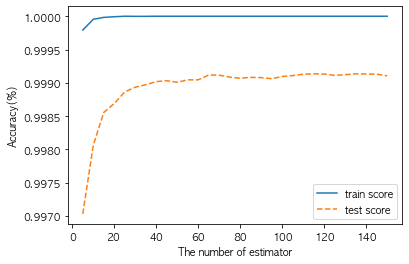

In [45]:
# 트리 개수 튜닝

n_estimator_min = 1
n_estimator_max = 31

optimi_estimator(algorithm, algorithm_name, 
                 X_train_deleted, y_train_deleted, X_test_deleted, y_test_deleted, 
                 n_estimator_min, n_estimator_max)

그래프 시각화 결과 학습데이터에서 과적합 발생</br>
트리기반 모델은 각 트리 모델별 bagging 방식을 사용하기때문에 트리 개수는 많을수록 과적합 방지에 유리함</br>
따라서 학습 정확도와 테스트 정확도의 차이가 가장 적으면서 트리 개수가 가장 많은 65을 최적의 트리 개수로 설정(인덱스 12번)

    depth  TrainScore  TestScore
0       1      0.6387     0.6391
1       2      0.6993     0.6992
2       3      0.7932     0.7933
3       4      0.8370     0.8366
4       5      0.8758     0.8757
5       6      0.8941     0.8941
6       7      0.9274     0.9275
7       8      0.9728     0.9727
8       9      0.9812     0.9808
9      10      0.9918     0.9906
10     11      0.9949     0.9935
11     12      0.9983     0.9966
12     13      0.9995     0.9979
13     14      0.9999     0.9985
14     15      1.0000     0.9988
15     16      1.0000     0.9990
16     17      1.0000     0.9989
17     18      1.0000     0.9989
18     19      1.0000     0.9990
19     20      1.0000     0.9990


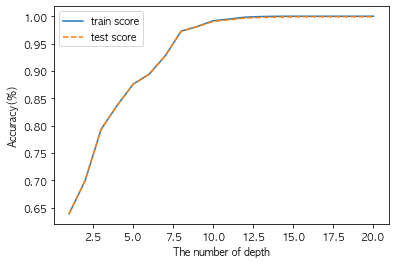

In [47]:
# 최대 깊이 튜닝

depth_min = 1
depth_max = 21
optimi_maxdepth(algorithm, algorithm_name, 
                X_train_deleted, y_train_deleted, X_test_deleted, y_test_deleted, 
                depth_min, depth_max, n_estimator)

최대 깊이는 적을수록 과적합 방지에 유리함</br>
따라서 최대 깊이는 적고 학습 정확도와 테스트 정확도의 차이가 적은 16으로 설정(인덱스 15번)

    min_samples_split  TrainScore  TestScore
0                   2      1.0000     0.9990
1                   4      1.0000     0.9988
2                   6      0.9999     0.9989
3                   8      0.9999     0.9987
4                  10      0.9998     0.9987
5                  12      0.9998     0.9987
6                  14      0.9997     0.9983
7                  16      0.9996     0.9985
8                  18      0.9996     0.9983
9                  20      0.9995     0.9983
10                 22      0.9994     0.9983
11                 24      0.9993     0.9982
12                 26      0.9994     0.9982
13                 28      0.9992     0.9981
14                 30      0.9991     0.9979
15                 32      0.9991     0.9980
16                 34      0.9991     0.9980
17                 36      0.9989     0.9978
18                 38      0.9989     0.9978
19                 40      0.9988     0.9976
20                 42      0.9988     0.9977
21        

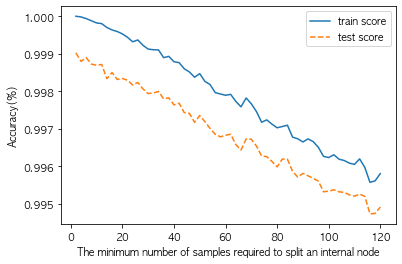

In [51]:
# 분리 노드 수 설정

n_split_min = 1
n_split_max = 61

# 데이터프레임 행 최대 100개까지 출력
pd.set_option('display.max_row', 100)
optimi_minsplit (algorithm, algorithm_name,
                 X_train_deleted, y_train_deleted, X_test_deleted, y_test_deleted,
                 n_split_min, n_split_max, n_estimator, n_depth)

분리 노드의 수는 많을수록 과적합 방지에 유리함</br>
따라서 학습 정확도와 테스트 정확도의 차이가 가장 적으면서 노드 수가 많은 114으로 설정(인덱스 56번)

    min_samples_leaf  TrainScore  TestScore
0                  2      0.9957     0.9949
1                  4      0.9958     0.9951
2                  6      0.9954     0.9945
3                  8      0.9956     0.9948
4                 10      0.9956     0.9948
5                 12      0.9953     0.9946
6                 14      0.9949     0.9942
7                 16      0.9953     0.9945
8                 18      0.9950     0.9943
9                 20      0.9945     0.9938
10                22      0.9946     0.9940
11                24      0.9945     0.9939
12                26      0.9944     0.9937
13                28      0.9942     0.9935
14                30      0.9939     0.9933
15                32      0.9942     0.9935
16                34      0.9937     0.9930
17                36      0.9936     0.9929
18                38      0.9936     0.9930
19                40      0.9934     0.9928
20                42      0.9938     0.9933
21                44      0.9929

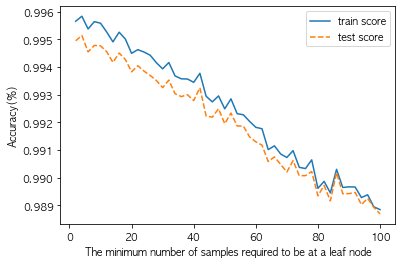

In [53]:
# 최종 잎사귀 노드 수 설정

n_leaf_min = 1
n_leaf_max = 51
optimi_minleaf(algorithm, algorithm_name, 
               X_train_deleted, y_train_deleted, X_test_deleted, y_test_deleted, 
               n_leaf_min, n_leaf_max, n_estimator, n_depth, n_split)

최종 노드 수는 많을수록 과적합 방지에 유리함</br>
따라서 학습 정확도와 테스트 정확도의 차이가 적으면서 노드 수가 가장 많은 52로 설정(인덱스 25번)

#### 튜닝 후 모델 학습

In [54]:
n_estimator = 65
n_depth = 16
n_split = 114
n_leaf = 25

In [55]:
# 모델 구축

rf_deleted_final = RandomForestClassifier(random_state=77,
                                         n_estimators=n_estimator,
                                         min_samples_leaf=n_leaf,
                                         min_samples_split=n_split,
                                         max_depth=n_depth)

rf_deleted_final.fit(X_train_deleted, y_train_deleted)

RandomForestClassifier(max_depth=16, min_samples_leaf=25, min_samples_split=114,
                       n_estimators=65, random_state=77)

In [56]:
# 모델 학습 정확도 파악

print(f'결측치 제거 모델 학습 정확도 :{rf_deleted_final.score(X_train_deleted, y_train_deleted).round(3)}')

# 과적합 개선된 것 확인

결측치 제거 모델 학습 정확도 :0.994


### 결측치 대체 모델 

    n_estimators  TrainScore  TestScore
0              5      0.9970     0.9674
1             10      0.9994     0.9735
2             15      0.9998     0.9762
3             20      0.9999     0.9780
4             25      1.0000     0.9790
5             30      1.0000     0.9795
6             35      1.0000     0.9801
7             40      1.0000     0.9802
8             45      1.0000     0.9806
9             50      1.0000     0.9805
10            55      1.0000     0.9810
11            60      1.0000     0.9811
12            65      1.0000     0.9813
13            70      1.0000     0.9814
14            75      1.0000     0.9813
15            80      1.0000     0.9815
16            85      1.0000     0.9816
17            90      1.0000     0.9815
18            95      1.0000     0.9815


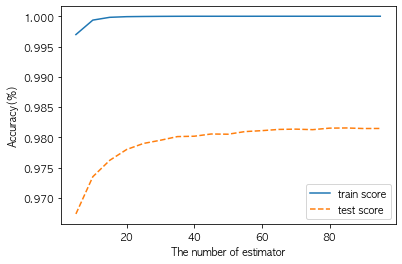

In [64]:
# 트리 개수 튜닝

n_estimator_min = 1
n_estimator_max = 20

optimi_estimator(algorithm, algorithm_name, 
                 X_train, y_train, X_test, y_test, 
                 n_estimator_min, n_estimator_max)

In [65]:
n_estimator = 85

    depth  TrainScore  TestScore
0       1      0.6523     0.6542
1       2      0.6592     0.6609
2       3      0.6822     0.6834
3       4      0.7090     0.7099
4       5      0.7515     0.7525
5       6      0.7984     0.7993
6       7      0.8256     0.8256
7       8      0.8558     0.8551
8       9      0.8849     0.8820
9      10      0.9098     0.9053
10     11      0.9318     0.9239
11     12      0.9504     0.9393
12     13      0.9679     0.9526
13     14      0.9804     0.9623


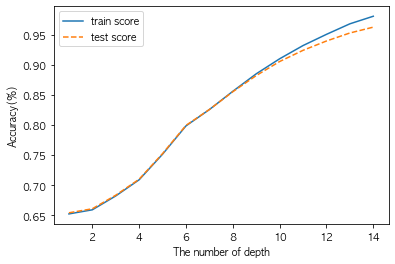

In [66]:
# 최대 깊이 튜닝

depth_min = 1
depth_max = 15
optimi_maxdepth(algorithm, algorithm_name, 
                X_train, y_train, X_test, y_test, 
                depth_min, depth_max, n_estimator)

In [68]:
n_depth = 14

    min_samples_split  TrainScore  TestScore
0                   2      0.9804     0.9623
1                   4      0.9819     0.9637
2                   6      0.9805     0.9633
3                   8      0.9797     0.9632
4                  10      0.9793     0.9633
5                  12      0.9775     0.9624
6                  14      0.9769     0.9625
7                  16      0.9755     0.9613
8                  18      0.9750     0.9615
9                  20      0.9742     0.9610
10                 22      0.9742     0.9613
11                 24      0.9732     0.9610
12                 26      0.9732     0.9610
13                 28      0.9724     0.9607
14                 30      0.9723     0.9610
15                 32      0.9716     0.9606
16                 34      0.9705     0.9594
17                 36      0.9702     0.9591
18                 38      0.9693     0.9587
19                 40      0.9690     0.9585
20                 42      0.9692     0.9587
21        

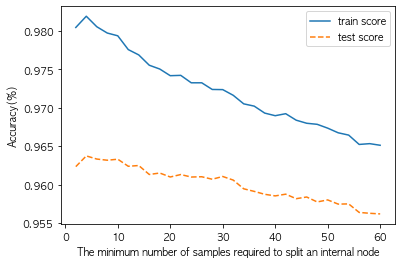

In [70]:
# 분리 노드 수 설정

n_split_min = 1
n_split_max = 31

# 데이터프레임 행 최대 100개까지 출력
pd.set_option('display.max_row', 100)
optimi_minsplit (algorithm, algorithm_name,
                 X_train, y_train, X_test, y_test,
                 n_split_min, n_split_max, n_estimator, n_depth)

In [71]:
n_split = 60

    min_samples_leaf  TrainScore  TestScore
0                  2      0.9646     0.9557
1                  4      0.9641     0.9557
2                  6      0.9635     0.9551
3                  8      0.9624     0.9544
4                 10      0.9619     0.9538
5                 12      0.9607     0.9525
6                 14      0.9606     0.9528
7                 16      0.9603     0.9526
8                 18      0.9591     0.9508
9                 20      0.9581     0.9505
10                22      0.9594     0.9519
11                24      0.9567     0.9495
12                26      0.9568     0.9497
13                28      0.9563     0.9497
14                30      0.9543     0.9474
15                32      0.9532     0.9468
16                34      0.9519     0.9454
17                36      0.9518     0.9458
18                38      0.9498     0.9439
19                40      0.9491     0.9432
20                42      0.9486     0.9429
21                44      0.9481

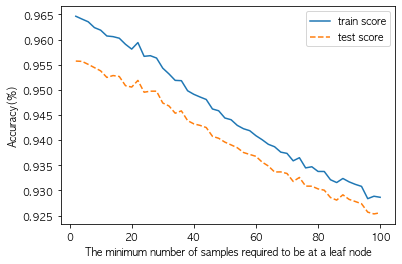

In [72]:
# 최종 잎사귀 노드 수 설정

n_leaf_min = 1
n_leaf_max = 51
optimi_minleaf(algorithm, algorithm_name, 
               X_train, y_train, X_test, y_test, 
               n_leaf_min, n_leaf_max, n_estimator, n_depth, n_split)

In [73]:
n_leaf = 92

In [75]:
# 모델 구축

rf_final = RandomForestClassifier(random_state=77,
                                         n_estimators=n_estimator,
                                         min_samples_leaf=n_leaf,
                                         min_samples_split=n_split,
                                         max_depth=n_depth)

rf_final.fit(X_train, y_train)

RandomForestClassifier(max_depth=14, min_samples_leaf=92, min_samples_split=60,
                       n_estimators=85, random_state=77)

In [166]:
# 모델 학습 정확도 파악

print(f'결측치 제거 모델 학습 정확도 :{rf_deleted_final.score(X_train_deleted, y_train_deleted).round(3)}')
print(f'결측치 대체 모델 학습 정확도 :{rf_final.score(X_train, y_train).round(3)}')

# 과적합 개선된 것 확인

결측치 제거 모델 학습 정확도 :0.994
결측치 대체 모델 학습 정확도 :0.931


In [165]:
# 결측치 제거 최종 모델 예측값
rf_deleted_final_predict = rf_deleted_final.predict(X_test_deleted)

In [77]:
# 결측치 제거 최종 모델 예측값
rf_final_predict = rf_final.predict(X_test)

In [79]:
# 결측치 제거 최종 모델 리포트
rf_deleted_final_report = classification_report(y_test_deleted, rf_deleted_final_predict)

print(f'결측치 제거 모델 리포트 : \n {rf_deleted_final_report} \n')

# 결측치 대체 최종 모델 리포트
rf_final_report = classification_report(y_test, rf_final_predict)

print(f'결측치 대체 모델 리포트 : \n {rf_final_report} \n')

결측치 제거 모델 리포트 : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    160175
           1       0.99      1.00      0.99    107609
           2       0.98      0.98      0.98     29299
           3       0.95      0.68      0.79      1371
           4       0.94      0.20      0.33       162

    accuracy                           0.99    298616
   macro avg       0.97      0.77      0.82    298616
weighted avg       0.99      0.99      0.99    298616
 

결측치 대체 모델 리포트 : 
               precision    recall  f1-score   support

           0       0.97      0.99      0.98    128182
           1       0.87      0.83      0.85     28265
           2       0.80      0.81      0.80     18508
           3       0.80      0.66      0.72     10946
           4       0.87      0.87      0.87     10040

    accuracy                           0.93    195941
   macro avg       0.86      0.83      0.85    195941
weighted avg       0.93      0.93      

<center>
    랜덤포레스트 모델 평가

|결측치 처리 방법|정확도|macro avg of f1-score|weighted avg of f1-score|
|---|---|---|---|
|결측치 제거|1.00|0.98|1.00|
|결측치 대체|0.98|0.96|0.98|</center>


</br>
<center>
    랜덤포레스트 튜닝 후 모델 평가

|결측치 처리 방법|정확도|macro avg of f1-score|weighted avg of f1-score|
|---|---|---|---|
|결측치 제거|0.99|0.82|0.99|
|결측치 대체|0.93|0.85|0.93|</center>

과적합이 개선되면서 결측치 제거 모델의 경우 데이터 비율이 적은 고위험군, 극위험군의 조화평균이 매우 감소함</br>
과적합 개선 후 결측치 대체 모델이 성능이 더 좋으므로 이후 모델에서는 결측치 대체 모델을 선택하고 튜닝 진행

## LGBM 모델 튜닝

### 결측치 제거 모델 

In [80]:
algorithm = LGBMClassifier
algorithm_name = 'lgbm'

    n_estimators  TrainScore  TestScore
0              5      0.9680     0.9678
1             10      0.9708     0.9706
2             15      0.9767     0.9765
3             20      0.9793     0.9791
4             25      0.9818     0.9814
5             30      0.9859     0.9855
6             35      0.9871     0.9865
7             40      0.9878     0.9872
8             45      0.9842     0.9837
9             50      0.9875     0.9869
10            55      0.9886     0.9877
11            60      0.9893     0.9884
12            65      0.9892     0.9882
13            70      0.9891     0.9881
14            75      0.9903     0.9893
15            80      0.9880     0.9870
16            85      0.9877     0.9865
17            90      0.9878     0.9866
18            95      0.9851     0.9839


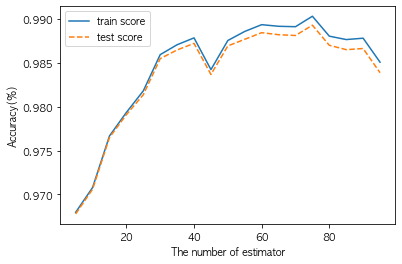

In [92]:
# 트리 개수 튜닝

n_estimator_min = 1
n_estimator_max = 20

optimi_estimator(algorithm, algorithm_name, 
                 X_train_deleted, y_train_deleted, X_test_deleted, y_test_deleted, 
                 n_estimator_min, n_estimator_max)

In [93]:
n_estimator = 20

    depth  TrainScore  TestScore
0       1      0.7658     0.7668
1       2      0.8591     0.8588
2       3      0.8953     0.8954
3       4      0.9430     0.9425
4       5      0.9752     0.9749
5       6      0.9778     0.9774
6       7      0.9779     0.9774
7       8      0.9791     0.9789
8       9      0.9781     0.9778
9      10      0.9787     0.9786
10     11      0.9785     0.9783
11     12      0.9793     0.9791
12     13      0.9793     0.9791
13     14      0.9793     0.9791


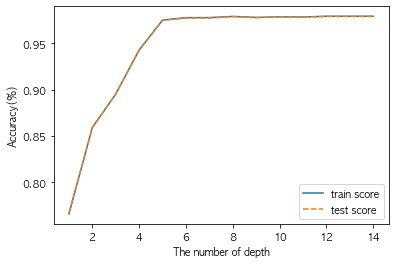

In [94]:
# 최대 깊이 튜닝

depth_min = 1
depth_max = 15
optimi_maxdepth(algorithm, algorithm_name, 
                X_train_deleted, y_train_deleted, X_test_deleted, y_test_deleted, 
                depth_min, depth_max, n_estimator)

In [95]:
n_depth = 12

In [96]:
# 모델 구축

lgbm_deleted_final = LGBMClassifier(random_state=77,
                                 n_estimators=n_estimator,
                                 max_depth=n_depth)

lgbm_deleted_final.fit(X_train_deleted, y_train_deleted)

LGBMClassifier(max_depth=12, n_estimators=20, random_state=77)

### 결측치 대체 모델

    n_estimators  TrainScore  TestScore
0              5      0.7713     0.7715
1             10      0.8373     0.8381
2             15      0.8626     0.8626
3             20      0.8786     0.8778
4             25      0.8925     0.8921
5             30      0.9033     0.9027
6             35      0.9115     0.9108
7             40      0.9200     0.9193
8             45      0.9272     0.9268
9             50      0.9325     0.9319
10            55      0.9384     0.9377
11            60      0.9423     0.9412
12            65      0.9467     0.9454
13            70      0.9500     0.9484
14            75      0.9537     0.9522
15            80      0.9561     0.9544
16            85      0.9590     0.9575
17            90      0.9617     0.9600
18            95      0.9637     0.9620


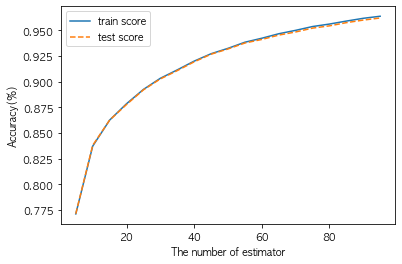

In [82]:
# 트리 개수 튜닝

n_estimator_min = 1
n_estimator_max = 20

optimi_estimator(algorithm, algorithm_name, 
                 X_train, y_train, X_test, y_test, 
                 n_estimator_min, n_estimator_max)

In [83]:
n_estimator = 95

    depth  TrainScore  TestScore
0       1      0.7338     0.7346
1       2      0.8334     0.8326
2       3      0.8777     0.8772
3       4      0.9167     0.9157
4       5      0.9440     0.9420
5       6      0.9550     0.9528
6       7      0.9582     0.9568
7       8      0.9605     0.9588
8       9      0.9615     0.9600
9      10      0.9620     0.9605
10     11      0.9622     0.9604
11     12      0.9629     0.9617
12     13      0.9633     0.9617
13     14      0.9636     0.9620


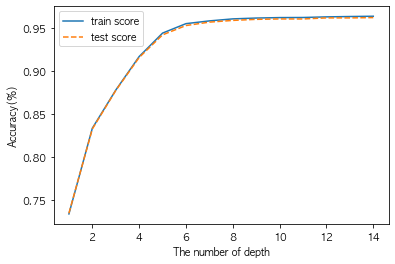

In [84]:
# 최대 깊이 튜닝

depth_min = 1
depth_max = 15
optimi_maxdepth(algorithm, algorithm_name, 
                X_train, y_train, X_test, y_test, 
                depth_min, depth_max, n_estimator)

In [85]:
n_depth = 12

In [88]:
# 모델 구축

lgbm_final = LGBMClassifier(random_state=77,
                                 n_estimators=n_estimator,
                                 max_depth=n_depth)

lgbm_final.fit(X_train, y_train)

LGBMClassifier(max_depth=12, n_estimators=95, random_state=77)

In [167]:
# 모델 학습 정확도 파악

print(f'결측치 제거 모델 학습 정확도 :{lgbm_deleted_final.score(X_train_deleted, y_train_deleted).round(3)}')
print(f'결측치 대체 모델 학습 정확도 :{lgbm_final.score(X_train, y_train).round(3)}')

결측치 제거 모델 학습 정확도 :0.979
결측치 대체 모델 학습 정확도 :0.963


In [103]:
# 결측치 제거 최종 모델 예측값
lgbm_deleted_final_predict = lgbm_deleted_final.predict(X_test_deleted)

In [90]:
# 결측치 대체 최종 모델 예측값
lgbm_final_predict = lgbm_final.predict(X_test)

In [168]:
# 결측치 제거 최종 모델 리포트
lgbm_deleted_final_report = classification_report(y_test_deleted, lgbm_deleted_final_predict)

print(f'결측치 제거 모델 리포트 : \n {lgbm_deleted_final_report} \n')

# 결측치 대체 최종 모델 리포트
lgbm_final_report = classification_report(y_test, lgbm_final_predict)

print(f'결측치 대체 모델 리포트 : \n {lgbm_final_report} \n')

결측치 제거 모델 리포트 : 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99    160175
           1       0.98      0.97      0.97    107609
           2       0.99      0.91      0.95     29299
           3       0.87      0.89      0.88      1371
           4       0.37      0.68      0.48       162

    accuracy                           0.98    298616
   macro avg       0.84      0.89      0.85    298616
weighted avg       0.98      0.98      0.98    298616
 

결측치 대체 모델 리포트 : 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99    128182
           1       0.91      0.93      0.92     28265
           2       0.87      0.85      0.86     18508
           3       0.89      0.82      0.85     10946
           4       0.95      0.96      0.96     10040

    accuracy                           0.96    195941
   macro avg       0.92      0.91      0.92    195941
weighted avg       0.96      0.96      

<center>
    LGBM 모델 평가</br>

|결측치 처리 방법|정확도|macro avg of f1-score|weighted avg of f1-score|
|---|---|---|---|
|결측치 제거|0.98|0.72|0.98|
|결측치 대체|0.99|0.97|0.99|</center>

<center>
    LGBM 튜닝 후 모델 평가</br>

|결측치 처리 방법|정확도|macro avg of f1-score|weighted avg of f1-score|
|---|---|---|---|
|결측치 제거|0.98|0.85|0.98|
|결측치 대체|0.96|0.92|0.96|</center>

결측치 제거 모델에 비해 결측치 대체 모델이 성능이 더 좋음 

## XGB 모델 튜닝

### 결측치 제거 모델

In [105]:
algorithm = XGBClassifier
algorithm_name = 'xgb'

    n_estimators  TrainScore  TestScore
0              5      0.9617     0.9617
1             10      0.9816     0.9816
2             15      0.9891     0.9886
3             20      0.9918     0.9914
4             25      0.9939     0.9934
5             30      0.9959     0.9954
6             35      0.9978     0.9973
7             40      0.9989     0.9985
8             45      0.9992     0.9988
9             50      0.9994     0.9990
10            55      0.9996     0.9992
11            60      0.9997     0.9994
12            65      0.9998     0.9995
13            70      0.9999     0.9996
14            75      0.9999     0.9996
15            80      0.9999     0.9997
16            85      0.9999     0.9997
17            90      1.0000     0.9997
18            95      1.0000     0.9997


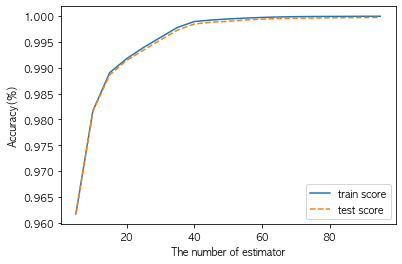

In [106]:
# 트리 개수 튜닝

n_estimator_min = 1
n_estimator_max = 20

optimi_estimator(algorithm, algorithm_name, 
                 X_train_deleted, y_train_deleted, X_test_deleted, y_test_deleted, 
                 n_estimator_min, n_estimator_max)

In [107]:
n_estimator = 80

    depth  TrainScore  TestScore
0       1      0.8955     0.8956
1       2      0.9705     0.9703
2       3      0.9860     0.9857
3       4      0.9955     0.9948
4       5      0.9995     0.9991
5       6      0.9999     0.9997
6       7      1.0000     0.9998
7       8      1.0000     0.9998
8       9      1.0000     0.9998
9      10      1.0000     0.9998
10     11      1.0000     0.9997
11     12      1.0000     0.9997
12     13      1.0000     0.9997
13     14      1.0000     0.9996


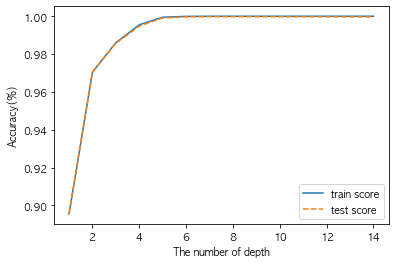

In [108]:
# 최대 깊이 튜닝

depth_min = 1
depth_max = 15
optimi_maxdepth(algorithm, algorithm_name, 
                X_train_deleted, y_train_deleted, X_test_deleted, y_test_deleted, 
                depth_min, depth_max, n_estimator)

In [144]:
n_depth = 6

In [145]:
# 모델 구축

xgb_deleted_final = XGBClassifier(random_state=77,
                                 n_estimators=n_estimator,
                                 max_depth=n_depth,
                                 eta=0.1)

xgb_deleted_final.fit(X_train_deleted, y_train_deleted)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False, eta=0.1,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.100000001, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=40, n_jobs=0,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=77, ...)

### 결측치 대체 모델

    n_estimators  TrainScore  TestScore
0              5      0.8511     0.8506
1             10      0.8777     0.8764
2             15      0.8996     0.8982
3             20      0.9177     0.9162
4             25      0.9312     0.9293
5             30      0.9419     0.9393
6             35      0.9506     0.9481
7             40      0.9569     0.9536
8             45      0.9618     0.9588
9             50      0.9655     0.9622
10            55      0.9691     0.9653
11            60      0.9725     0.9684
12            65      0.9759     0.9716
13            70      0.9782     0.9739
14            75      0.9811     0.9764
15            80      0.9829     0.9785
16            85      0.9845     0.9804
17            90      0.9858     0.9817
18            95      0.9870     0.9830


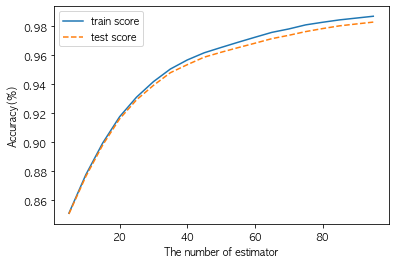

In [111]:
# 트리 개수 튜닝

n_estimator_min = 1
n_estimator_max = 20

optimi_estimator(algorithm, algorithm_name, 
                 X_train, y_train, X_test, y_test, 
                 n_estimator_min, n_estimator_max)

In [113]:
n_estimator = 40

    depth  TrainScore  TestScore
0       1      0.7208     0.7212
1       2      0.8197     0.8192
2       3      0.8635     0.8633
3       4      0.9041     0.9027
4       5      0.9354     0.9331
5       6      0.9569     0.9536
6       7      0.9740     0.9683
7       8      0.9863     0.9791
8       9      0.9939     0.9846
9      10      0.9980     0.9876
10     11      0.9995     0.9885
11     12      0.9999     0.9887
12     13      1.0000     0.9889
13     14      1.0000     0.9888


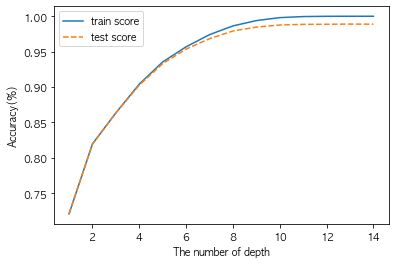

In [114]:
# 최대 깊이 튜닝

depth_min = 1
depth_max = 15
optimi_maxdepth(algorithm, algorithm_name, 
                X_train, y_train, X_test, y_test, 
                depth_min, depth_max, n_estimator)

In [115]:
n_depth = 12

In [125]:
# 모델 구축

xgb_final = XGBClassifier(random_state=77,
                         n_estimators=n_estimator,
                         max_depth=n_depth,
                         eta=0.01)

xgb_final.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False, eta=0.01,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.00999999978, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=12, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=40, n_jobs=0,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=77, ...)

In [169]:
# 모델 학습 정확도 파악

print(f'결측치 제거 모델 학습 정확도 :{xgb_deleted_final.score(X_train_deleted, y_train_deleted).round(3)}')
print(f'결측치 대체 모델 학습 정확도 :{xgb_final.score(X_train, y_train).round(3)}')

결측치 제거 모델 학습 정확도 :0.986
결측치 대체 모델 학습 정확도 :0.971


In [150]:
# 결측치 제거 최종 모델 예측값
xgb_deleted_final_predict = xgb_deleted_final.predict(X_test_deleted)

In [148]:
# 결측치 대체 최종 모델 예측값
xgb_final_predict = xgb_final.predict(X_test)

In [170]:
# 결측치 제거 최종 모델 리포트
xgb_deleted_final_report = classification_report(y_test_deleted, xgb_deleted_final_predict)

print(f'결측치 제거 모델 리포트 : \n {xgb_deleted_final_report} \n')

# 결측치 대체 최종 모델 리포트
xgb_final_report = classification_report(y_test, xgb_final_predict)

print(f'결측치 대체 모델 리포트 : \n {xgb_final_report} \n')

결측치 제거 모델 리포트 : 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99    160175
           1       0.98      0.98      0.98    107609
           2       0.98      0.94      0.96     29299
           3       0.90      0.73      0.81      1371
           4       0.92      0.48      0.63       162

    accuracy                           0.99    298616
   macro avg       0.95      0.83      0.87    298616
weighted avg       0.99      0.99      0.99    298616
 

결측치 대체 모델 리포트 : 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99    128182
           1       0.92      0.94      0.93     28265
           2       0.90      0.87      0.88     18508
           3       0.86      0.85      0.85     10946
           4       0.94      0.93      0.94     10040

    accuracy                           0.96    195941
   macro avg       0.92      0.92      0.92    195941
weighted avg       0.96      0.96      

<center>
    XGBoost 모델 평가</br>

|결측치 처리 방법|정확도|macro avg of f1-score|weighted avg of f1-score|
|---|---|---|---|
|결측치 제거|0.98|0.72|0.98|
|결측치 대체|0.99|0.97|0.99|</center>

<center>
    XGBoost 튜닝 후 모델 평가</br>

|결측치 처리 방법|정확도|macro avg of f1-score|weighted avg of f1-score|
|---|---|---|---|
|결측치 제거|1.00|0.99|1.00|
|결측치 대체|0.96|0.92|0.96|</center>

## 모델별 특성 중요도 확인

In [152]:
# 특성 중요도 확인용 함수
def get_top_features(model):
    ftr_importances_values = model.feature_importances_
    ftr_importances = pd.Series(ftr_importances_values, index=features)
    ftr_top10 = ftr_importances.sort_values(ascending=False)[:10]
    return ftr_top10

# 특성 중요도 시각화 함수
def visualize_ftr_importances(models):
    fig, axs = plt.subplots(figsize=(24,10),nrows=1, ncols=3)
    

    for i, model in enumerate(models):
        ftr_top10 = get_top_features(model)
        axs[i].set_title(model.__class__.__name__+' 특성 중요도', size=25)
        for label in (axs[i].get_xticklabels() + axs[i].get_yticklabels()):
            label.set_fontsize(22)
        sns.barplot(x=ftr_top10.values, y=ftr_top10.index , ax=axs[i])
        fig.tight_layout() 

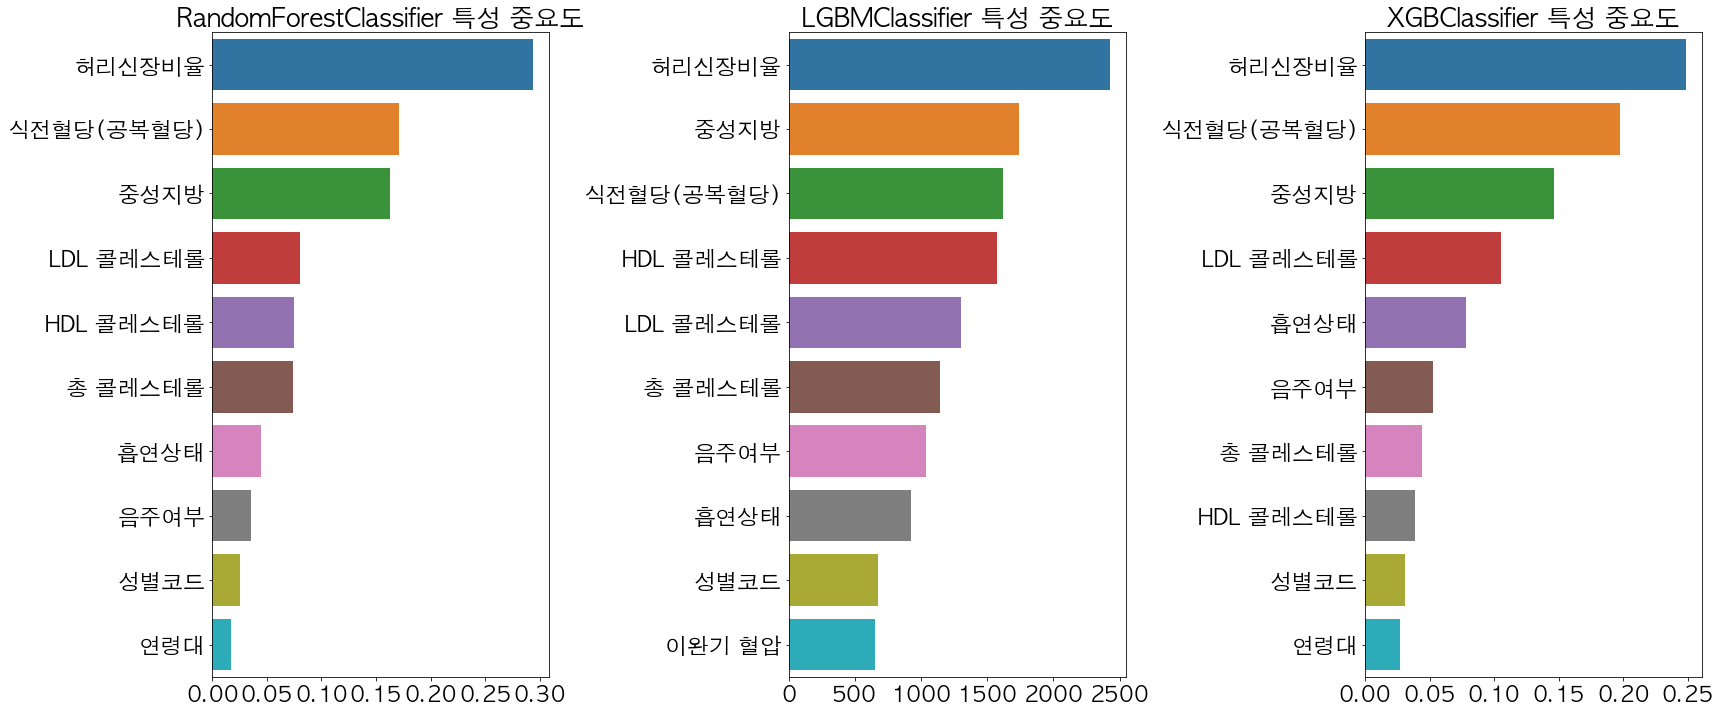

In [163]:
models = [rf_final, lgbm_final, xgb_final]

visualize_ftr_importances(models)

In [155]:
import eli5 
from eli5.sklearn import PermutationImportance 

In [164]:
# import sklearn
# sklearn.metrics.get_scorer_names()

In [162]:
perm = PermutationImportance(xgb_final, scoring='f1_macro', random_state=77).fit(X_test, y_test) 
eli5.show_weights(perm, top=15, feature_names=X.columns.tolist())

Weight,Feature
0.5015 ± 0.0037,허리신장비율
0.4164 ± 0.0040,식전혈당(공복혈당)
0.3892 ± 0.0017,중성지방
0.2564 ± 0.0021,흡연상태
0.2352 ± 0.0022,음주여부
0.2118 ± 0.0023,HDL 콜레스테롤
0.1971 ± 0.0011,LDL 콜레스테롤
0.1051 ± 0.0017,성별코드
0.1014 ± 0.0016,총 콜레스테롤
0.0677 ± 0.0017,연령대
